<a href="https://colab.research.google.com/github/kjfms/NIA-Project/blob/main/Code/%EC%9E%A5%ED%9D%A5%EA%B5%B0%EC%B2%AD_%ED%99%98%EA%B2%BD%EA%B4%80%EB%A6%AC%EA%B3%BC_%EB%AF%BC%EC%9B%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선수행 작업

## 기본 패키지 설치

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Konlpy & mecab 설치

In [ ]:
#한글 깨짐 방지. 처음 할 때 수행하고 런타임 다시시작 후 돌리지 말 것
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!apt-get update !apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
okt = Okt()

## 구글드라이브와 데이터 연동

In [ ]:
#나오는 주소창 눌러서 코드 얻기
from google.colab import drive
drive.mount('content')

Mounted at content


## 데이터 불러오기


In [ ]:
data1 = pd.read_csv('/content/content/MyDrive/NIA/Data/minwon_not_append.csv')
data2 = pd.read_csv('/content/content/MyDrive/NIA/Data/minwon_append.csv')
#nan값 있으면 밑에 okt.nouns가 에러 뜨기 때문에 이를 대체
data2.fillna({'공개내용' : ' '},inplace=True)

# 환경관리과
### 할 때, 여기서부터 하고 싶다면 맨 앞에 데이터 불러오기 수행할 것

### 데이터 불러오기

In [ ]:
data1_index = []
for i in range(len(data1)):
  if data1.loc[i,'처리부서'] == '전라남도 장흥군 환경관리과' :
    data1_index.append(i)

data2_index = []
for i in range(len(data2)):
  if data2.loc[i,'처리부서'] == '전라남도 장흥군 환경관리과' :
    data2_index.append(i)

In [ ]:
envi_data1 = data1.loc[data1_index,:]
envi_data2 = data2.loc[data2_index,:]

### 명사 추출

In [ ]:
# 2글자 이상인 명사만 추출
# text는 하나의 리스트인데, 또 안에 문장 별로 리스트가 나눠져 있는 이중구조
# 이렇게 이중구조 한 이유가 나중에 무언가를 실행하기 위해서일걸?
# 그걸 떠나서 문장별로 어떤 단어가 들어있는지 확인하기도 용이 (DTM 형태 변환이 자유로움)
#loc 에러나서 iloc으로 수정 (4 : 청구제목, 5 : 청구내용, 9 : 공개내용)

envi_text = []

for i in range(len(envi_data1)):
  contents = envi_data1.iloc[i,4]
  title = envi_data1.iloc[i,5]
  envi_text.append([c for c in okt.nouns(contents) if len(c) >= 2])
  envi_text.append([t for t in okt.nouns(title) if len(t) >= 2])

for j in range(len(envi_data2)):
  open = envi_data2.iloc[j,9]
  envi_text.append([o for o in okt.nouns(open) if len(o) >= 2])



### 불용어 정의

In [ ]:
#불용어사전
stopwords = ['아래', '상상', '제안', '까지', '닷컴', '포털', '사이트', '천만', '오아시스', '이벤트', '접수','서울시','서울','특별시',
             '천만상상','파일','첨부','응모','슬로건','공모','공모전','응모전','신청','경우','때문','정도','사항',
                   '해당','겁니다','이것','저것','그것','돋움','신명', '태명', '한컴', '돋움',
                   '동안','거기','저기','여기','대부분','누구','무엇','고딕','만큼','굴림','감사','건지','텐데',
                   '안녕','이번','걸로','수고','겁니까','그간','그건','그때','글쓴이','누가','니다','다면',
                   '뭔가','상상오아시스','하다','이다','되다','같다','궁','자체','서체','정','서','이','을','있다','없다', '체','관련',
                   '생각', '현재', '진행', '사람', '마음', '남산', '내용', '현실','음','막','김','변','조',
                   '오','참','동','지금','주변','대상','부분','요즘','하루','마련','세대','시간','이상','행위',
                   '활동','구분','사실','과정','모습','기간','선정','단지','자신','발생','지역','기대','마련',
                   '장소','모두','부탁','제공','이용','해주','당시','최근','민원','문제','문제점','현황','개선','방안',
                   '문의','답변','일동','요청','담당자','직원','방법','사용','활용','확인','방식','예전']

stopwords.append('자료')
stopwords.append('정보')
stopwords.append('공개')
stopwords.append('청구')
stopwords.append('정보공개')
#아래부터는 환경관리과에서만 해당
stopwords.append('검사')
stopwords.append('업체')
stopwords.append('사업')
stopwords.append('시설')
stopwords.append('명령')
stopwords.append('정밀')
stopwords.append('조사')
stopwords.append('안녕하십니까')
stopwords.append('대한')
stopwords.append('우리')
stopwords.append('행정처분')
stopwords.append('특정')
stopwords.append('기준')
stopwords.append('대해')
stopwords.append('주시')
stopwords.append('장흥군')
stopwords.append('오니')
stopwords.append('무궁')
stopwords.append('참고')
stopwords.append('정보공')
stopwords.append('귀하')
stopwords.append('시기')
stopwords.append('군청')
stopwords.append('연락')
stopwords.append('대하')
stopwords.append('습니')
stopwords.append('장흥')
stopwords.append('기물')
stopwords.append('년도')
stopwords.append('해주시')

### 빈도

In [ ]:
# nouns : 문장 구분 없이 추출
# 2글자 이상인 명사만 추출
envi_nouns = []

for i in range(len(envi_data1)):
  contents = envi_data1.iloc[i,4]
  title = envi_data1.iloc[i,5]
  for k in okt.nouns(contents):
    if len(k) >= 2 :
      envi_nouns.append(k)
  
  for t in okt.nouns(title):
    if len(t) >= 2:
      envi_nouns.append(t)

for j in range(len(envi_data2)):
  open = envi_data2.iloc[j,9]
  for o in okt.nouns(open):
    if len(o) >= 2 :
      envi_nouns.append(o)

In [ ]:
#중복 제거
new_envi_nouns = []
for v in envi_nouns:
    if v not in new_envi_nouns:
        new_envi_nouns.append(v)

In [ ]:
for_envi_bindo = []
#불용어 처리
for t1 in range(len(new_envi_nouns)):
  if new_envi_nouns[t1] not in stopwords:
    for_envi_bindo.append(new_envi_nouns[t1])

In [ ]:
# 각 키워드가 포함된 행 수 추출
# evni_data1에 대해서
#프로세스
#특정 단어가 들어가 있다면, 청구제목, 청구내용, 공개내용을 추출해 하나의 열로 만들고
#나중에 len()함수를 적용하기 때문에 문장별 1개씩 밖에 안 나옴
a = []

for word in for_envi_bindo:
    data11 = envi_data1[envi_data1['청구제목'].str.contains(word, na = False)]
    data22 = envi_data1[envi_data1['청구내용'].str.contains(word, na = False)]
    data33 = envi_data1[envi_data1['공개내용'].str.contains(word, na = False)]
    result = pd.concat([data11,data22,data33])
    result.drop_duplicates(inplace=True)
    a.append(len(result))

In [ ]:
# envi_data2에 대해서
# 사실 data2의 경우 청구제목, 청구내용 굳이 안해도 되긴 하는데 그냥

b = []
for word in for_envi_bindo:
    data11 = envi_data2[envi_data2['청구제목'].str.contains(word, na = False)]
    data22 = envi_data2[envi_data2['청구내용'].str.contains(word, na = False)]
    data33 = envi_data2[envi_data2['공개내용'].str.contains(word, na = False)]
    result = pd.concat([data11,data22,data33])
    result.drop_duplicates(inplace=True)
    b.append(len(result))

In [ ]:
#두 데이터 결과 합치기
envi_freq = [x+y for x,y in zip(a, b)]

In [ ]:
# 데이터 프레임 생성
envi_bindo = pd.DataFrame({'단어' : for_envi_bindo,
                          '빈도' : envi_freq})

In [ ]:
envi_bindo_dict = {}
for i in range(len(envi_bindo)):
  envi_bindo_dict[envi_bindo.loc[i,'단어']] = envi_bindo.loc[i,'빈도']

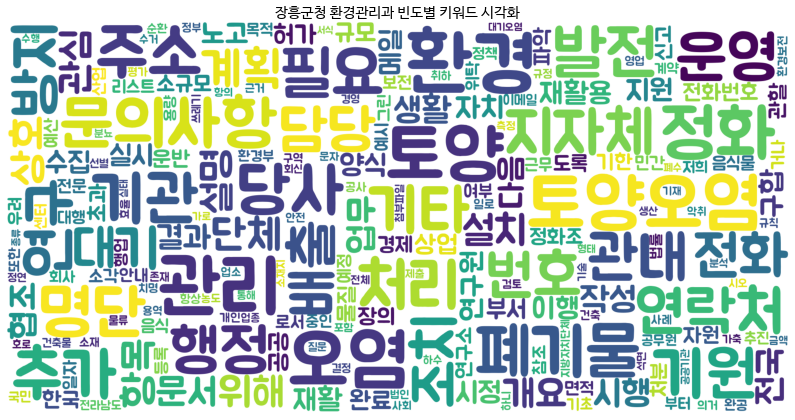

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')
plt.rc('font',size=12)

wordcloud = WordCloud(font_path = '/content/content/MyDrive/Font/BMJUA.ttf',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000, max_font_size = 200).generate_from_frequencies(envi_bindo_dict)
#font_path : 폰트가 저장된 경로
#relative_scaling : 잘 모르겠으나, 글자 사이의 무슨 그런 거 아닐까
#backgroud_color : 배경색
#width : 화면 넓이
#height : 화면 높이
#max_words : 화면 상 나타나는 글자 수
#max_font_size : 제일 큰 글자의 크기
#.generate_from_frequencies(사전) : 글자 크기를 결정하는 사전. (단어 : 수치) 형태

plt.imshow(wordcloud)
plt.axis('off')
plt.title('장흥군청 환경관리과 빈도별 키워드 시각화')
plt.show()

### TF-IDF

In [ ]:
envi_df = pd.DataFrame({'nouns' : envi_text})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_envi = TfidfVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=5, # 최소 문서 수 5건
                             ngram_range=(1,1), #Bigram : ngram_range=(1,2)
                             smooth_idf=True,
                             stop_words = stopwords
                             )
tfidf_vector_envi = tfidf_vectorizer_envi.fit_transform(envi_df['nouns'].astype('str')) # tf-idf값으로 채워진 DTM생성
tfidf_scores_envi = tfidf_vector_envi.toarray().sum(axis = 0)
tfidf_idx_envi = np.argsort(-tfidf_scores_envi) # 1차원 배열 거꾸로 정렬 의미
tfidf_scores_envi2 = tfidf_scores_envi[tfidf_idx_envi] # 인덱스
tfidf_vocab_envi = np.array(tfidf_vectorizer_envi.get_feature_names())[tfidf_idx_envi] # 인덱스에 해당하는 단어 추출
tfidf_df_envi = pd.DataFrame({'단어' : tfidf_vocab_envi, '점수' : tfidf_scores_envi2})

In [ ]:
envi_dict = {}
for i in range(len(tfidf_df_envi)):
  envi_dict[tfidf_df_envi.loc[i,'단어']] = tfidf_df_envi.loc[i,'점수']

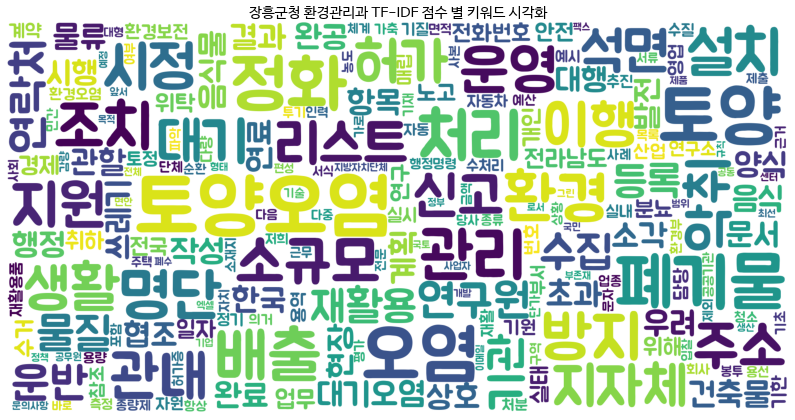

In [ ]:
plt.figure(figsize = (14,10))
plt.rc('font', family='NanumBarunGothic')
plt.rc('font',size=12)

wordcloud = WordCloud(font_path = '/content/content/MyDrive/Font/BMJUA.ttf',relative_scaling = 0.2,
                      background_color = 'white', width = 2000,
                      height = 1000, max_font_size = 200).generate_from_frequencies(envi_dict)
#font_path : 폰트가 저장된 경로
#relative_scaling : 잘 모르겠으나, 글자 사이의 무슨 그런 거 아닐까
#backgroud_color : 배경색
#width : 화면 넓이
#height : 화면 높이
#max_words : 화면 상 나타나는 글자 수
#max_font_size : 제일 큰 글자의 크기
#.generate_from_frequencies(사전) : 글자 크기를 결정하는 사전. (단어 : 수치) 형태

plt.imshow(wordcloud)
plt.axis('off')
plt.title('장흥군청 환경관리과 TF-IDF 점수별 키워드 시각화')
plt.show()